In [1]:
mkdir airbnb-open-data-in-nyc

mkdir: cannot create directory ‘airbnb-open-data-in-nyc’: File exists


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import PIL
import wordcloud 

%matplotlib inline

In [0]:
#loading the dataset
df_listings = pd.read_csv("./airbnb-open-data-in-nyc/listings_summary.csv")
df_calendar = pd.read_csv("./airbnb-open-data-in-nyc/calendar_detail.csv")
df_reviews = pd.read_csv("./airbnb-open-data-in-nyc/reviews_detail.csv")
df_neighbourhoods = pd.read_csv("./airbnb-open-data-in-nyc/neighbourhoods.csv")

In [0]:
# replacing NaN values with 0
df_listings.fillna(0, inplace=True)

df_listings = df_listings[df_listings.price  > 0]

In [5]:
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18461891,"Bright, comfortable 1B studio near everything!",916092,Connie Mae,Queens,Ditmars Steinway,40.774142,-73.916246,Entire home/apt,110,6,0,0,0.00,1,0
1,20702398,Quiet house on City Island,1457680,James,Bronx,City Island,40.849191,-73.786509,Private room,50,1,2,2017-10-01,2.00,1,169
2,6627449,Large 1 BDRM in Great location,13886510,Arlene,Bronx,City Island,40.849775,-73.786609,Entire home/apt,125,3,21,2017-09-26,0.77,1,363
3,19949243,Stay aboard a sailboat,1149260,MoMo,Bronx,City Island,40.848838,-73.782276,Entire home/apt,100,3,0,0,0.00,1,90
4,1886820,Quaint City Island Community.,9815788,Steve,Bronx,City Island,40.841144,-73.783052,Entire home/apt,300,7,0,0,0.00,1,365


In [6]:
# Categorize listings based on room_type

df_listings_roomtype = df_listings.groupby('room_type').id.count()
df_listings_roomtype = df_listings_roomtype.reset_index()
df_listings_roomtype = df_listings_roomtype.rename(columns={'id':'Number of Listings'})
df_listings_roomtype

,room_type,Number of Listings
0,Entire home/apt,22055
1,Private room,21080
2,Shared room,1132


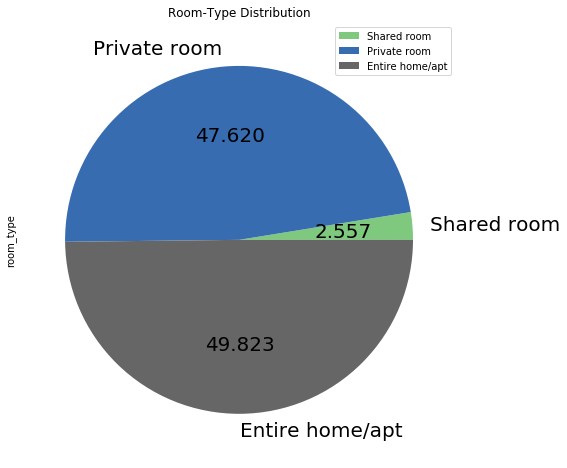

In [7]:
#Visualizing room-types
room_type = df_listings.room_type
room_type_count = collections.Counter(room_type)

df_listings_roomtype = pd.DataFrame.from_dict(room_type_count, orient='index').sort_values(by=0)
df_listings_roomtype.columns = ['room_type']
df_listings_roomtype.plot.pie(y = 'room_type', 
                 colormap = 'Accent', 
                 figsize=(8,8), 
                 fontsize = 20, autopct = '%.3f',
                 legend = True,
                 title = 'Room-Type Distribution')

In [8]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9452127,58944174,2016-01-05,6279455,Ravi,Great place. Helena was prompt to reply and ve...
1,9452127,59446510,2016-01-10,23770684,Shiv,We had previously stayed at the apartment over...
2,9452127,59557387,2016-01-11,29070567,Jandall,Helena was a great host and extremely accommod...
3,9452127,62664325,2016-02-15,58381183,Cody,Helena was extremely accessible throughout the...
4,9452127,63410004,2016-02-22,29014080,Magnus,Awesome place! Looks just as in photos. Plenty...


In [9]:
df_reviews['comments'] = df_reviews['comments'].astype(str)
text = " ".join(review for review in df_reviews.comments)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 268977646 words in the combination of all review.


In [0]:
#generate word cloud
nyc = np.array(PIL.Image.open("NYC.png"))

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
transformed_nyc = np.ndarray((nyc.shape[0],nyc.shape[1]), np.int32)

for i in range(len(nyc)):
    transformed_nyc[i] = list(map(transform_format, nyc[i]))

stopwords = set(wordcloud.STOPWORDS)
wc = wordcloud.WordCloud(background_color="white", max_words=4000, mask=transformed_nyc,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine.png")



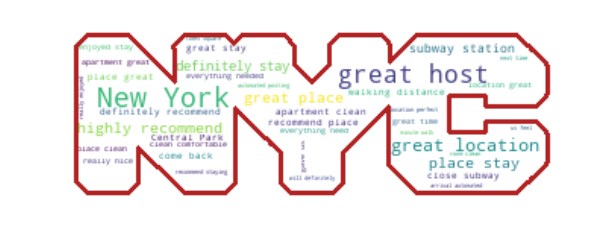

In [17]:
# show
plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()